<a href="https://colab.research.google.com/github/Chirag314/Interpretable-AI/blob/main/Explainable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.6 MB/s eta 0:00:00


In [ ]:
import shap
import sklearn
import pandas as pd
df=pd.read_csv('/content/energydata_complete.csv')

In [ ]:
del df['date']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [ ]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
y=df.pop('Appliances')
X=df

In [ ]:
model=sklearn.linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
#Print Coefficients
print('Model Coefficients:\n')
for i in range(X.shape[1]):
  print(X.columns[i],"=",model.coef_[i].round(5))

Model Coefficients:

lights = 1.98971
T1 = -0.60374
RH_1 = 15.15362
T2 = -17.70602
RH_2 = -13.48062
T3 = 25.4064
RH_3 = 4.92457
T4 = -3.46525
RH_4 = -0.17891
T5 = -0.02784
RH_5 = 0.14096
T6 = 7.12616
RH_6 = 0.28795
T7 = 1.79463
RH_7 = -1.54968
T8 = 8.14656
RH_8 = -4.66968
T9 = -15.87243
RH_9 = -0.90102
T_out = -10.22819
Press_mm_hg = 0.13986
RH_out = -1.06375
Windspeed = 1.70364
Visibility = 0.15368
Tdewpoint = 5.0488
rv1 = -0.02078
rv2 = -0.02078


In [ ]:
#Compute SHAP values for the linear model
explainer=shap.Explainer(model.predict,X)


In [ ]:
#SHAP value calculation
shap_values=explainer(X)


PermutationExplainer explainer: 19736it [15:28, 21.11it/s]                           


SHAP values have 3 objests 1. the SHAP value for each feature 2. the base value and 3. the original training data. As there are 27 features , we expect 27 SHAP values.

In [ ]:
import numpy as np
pd.DataFrame(np.round(shap_values.values,3)).head(3)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,54.916,1.125,111.299,22.239,-60.481,-65.677,26.330,6.334,-1.129,0.066,...,38.380,-3.374,15.269,-2.924,-15.004,4.586,4.023,6.758,0.297,0.297
1,54.916,1.125,97.610,22.239,-59.571,-65.677,26.625,6.334,-1.205,0.066,...,37.851,-3.401,16.462,-2.910,-15.004,4.018,3.433,6.253,0.186,0.186
2,54.916,1.125,91.650,22.239,-58.280,-65.677,27.331,6.588,-1.187,0.066,...,38.909,-3.347,17.656,-2.896,-15.004,3.450,2.844,5.748,-0.022,-0.022


In [ ]:
# Average prediction value is called as the base value
pd.DataFrame(np.round(shap_values.base_values,3)).head(3)

,0
0,95.815
1,95.815
2,95.815


In [ ]:
pd.DataFrame(np.round(shap_values.data,3)).head(3)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,30.0,19.89,47.597,19.2,44.790,19.79,44.730,19.000,45.567,17.167,...,17.033,45.53,6.600,733.5,92.0,7.000,63.000,5.3,13.275,13.275
1,30.0,19.89,46.693,19.2,44.722,19.79,44.790,19.000,45.992,17.167,...,17.067,45.56,6.483,733.6,92.0,6.667,59.167,5.2,18.606,18.606
2,30.0,19.89,46.300,19.2,44.627,19.79,44.933,18.927,45.890,17.167,...,17.000,45.50,6.367,733.7,92.0,6.333,55.333,5.1,28.643,28.643


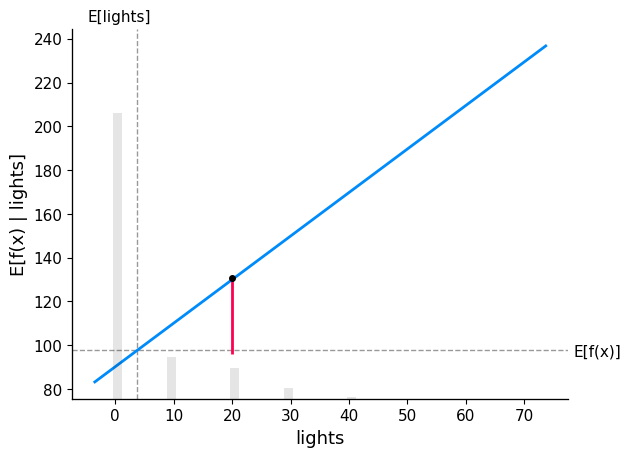

In [ ]:
#Partial dependency plot
sample=20
shap.partial_dependence_plot("lights",model.predict,X,model_expected_value=True,feature_expected_value=True,ice=False,shap_values=shap_values[sample:sample+1])

Here 20th sample is selected from train dataset. Figure shows partial dependency superimposed with the 20th record in red.

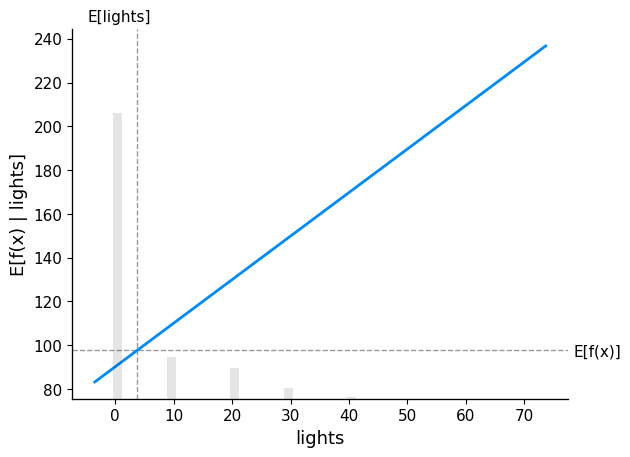

In [ ]:
shap.partial_dependence_plot('lights',model.predict,X,ice=False,model_expected_value=True,feature_expected_value=True)

Waterfalls plot shows how we get from shap_values.base_values to model.predict(X)[sample]

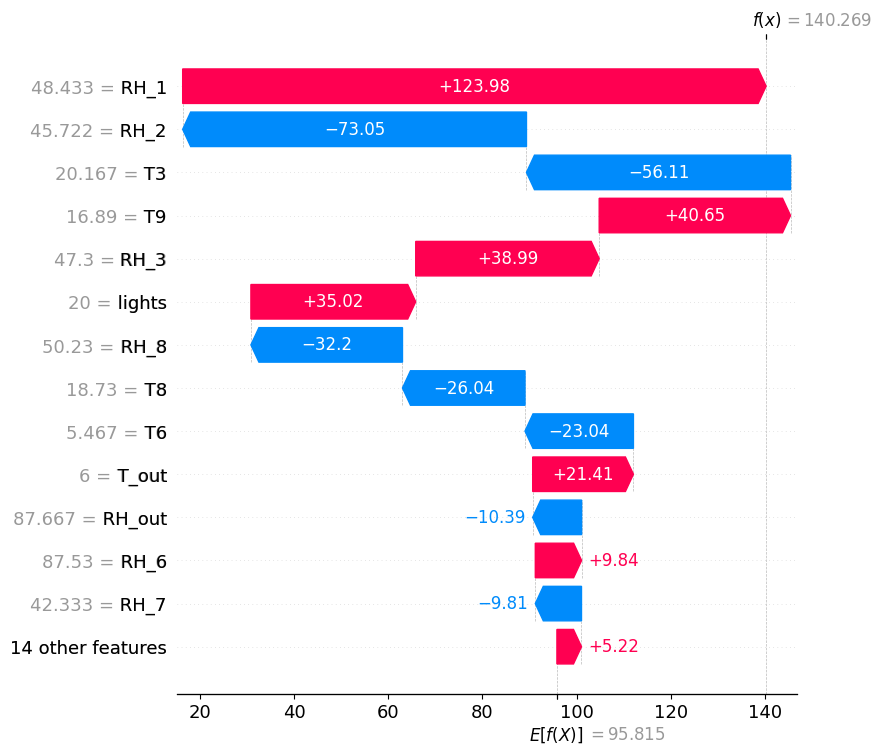

In [ ]:
shap.plots.waterfall(shap_values[sample],max_display=14)

The predicted output for the 20th record is 140. The most influential feature impacting the 20th record is RH_1 which is humidity in kitchen area in percentage and RH2 which is humidity in living area. In the bottom part there are 14 other features which are not very important for 20th record prediction.

In [ ]:
# Feature importnace using the SHAP values

feature_names=shap_values.feature_names
shap_df=pd.DataFrame(shap_values.values,columns=feature_names)
vals=np.abs(shap_df.values).mean(0)
shap_importance=pd.DataFrame(list(zip(feature_names,vals)),columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
print(shap_importance)

       col_name  feature_importance_vals
2          RH_1                48.898098
19        T_out                43.634276
4          RH_2                42.890944
5            T3                40.503487
11           T6                34.648646
3            T2                30.416245
17           T9                25.669976
16         RH_8                20.145285
24    Tdewpoint                17.008406
21       RH_out                13.417327
6          RH_3                13.308497
15           T8                12.744739
0        lights                10.170411
12         RH_6                 7.669429
14         RH_7                 6.648869
7            T4                 5.572553
22    Windspeed                 3.447370
13           T7                 3.118758
18         RH_9                 3.092595
23   Visibility                 1.373324
10         RH_5                 0.864137
20  Press_mm_hg                 0.842126
1            T1                 0.752479
8          RH_4 

We will create beeswarm chart to show the impact of SHAP values on model output. Blue dots shows low feature values and red dots shows high feature values.Each dot indicate one data point from dataset. Plot shows the distribution of feature values against the SHAP values.

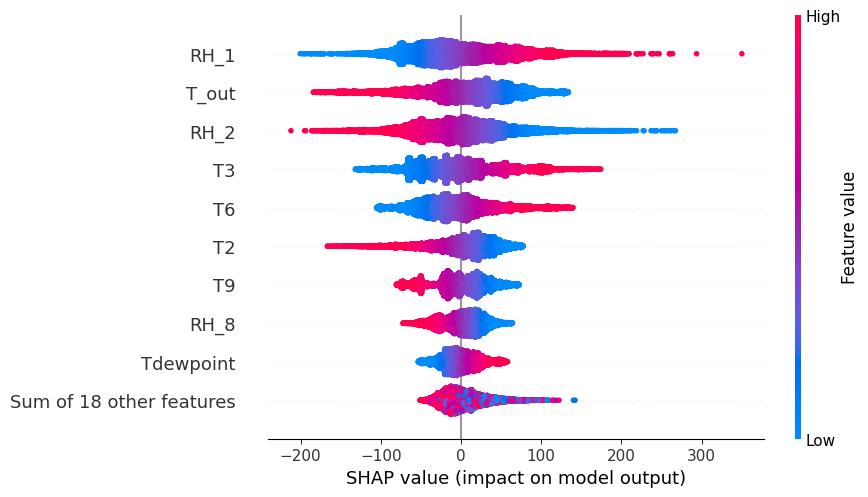

In [ ]:
shap.plots.beeswarm(shap_values)

SHAP values of a regression Model on mixed input values: Categorical + Numeric


In [ ]:
df_auto=pd.read_csv('https://raw.githubusercontent.com/pradmishra1/PublicDatasets/main/automobile.csv')
df_auto.head()

,Price,Make,Location,Age,Odometer,FuelType,Transmission,OwnerType,Mileage,EngineCC,PowerBhp
0,1.75,marutiwagonr,Mumbai,10,72000,CNG,Manual,First,26.6,998,58.16
1,12.50,hyundaicreta,Pune,5,41000,Diesel,Manual,First,19.67,1582,126.2
2,4.50,hondajazz,Chennai,9,46000,Petrol,Manual,First,18.2,1199,88.7
3,6.00,marutiertiga,Chennai,8,87000,Diesel,Manual,First,20.77,1248,88.76
4,17.74,audia4,Coimbatore,7,40670,Diesel,Automatic,Second,15.2,1968,140.8


In [ ]:
df_auto.columns

Index(['Price', 'Make', 'Location', 'Age', 'Odometer', 'FuelType',
       'Transmission', 'OwnerType', 'Mileage', 'EngineCC', 'PowerBhp'],
      dtype='object')

We can not use string -based features or categorcal featuers in the model direcly as matrix multiplication is not possible on string features.Hence string features needs to be transformed into dummy features.


In [ ]:
# Import transformed dataset
df_autot=pd.read_csv('https://raw.githubusercontent.com/pradmishra1/PublicDatasets/main/Automobile_transformed.csv')
del df_autot['Unnamed: 0']
df_autot.head()

,Price,Age,Odometer,mileage,engineCC,powerBhp,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Mumbai,Location_Pune,FuelType_Diesel,FuelType_Electric,FuelType_LPG,FuelType_Petrol,Transmission_Manual,OwnerType_Fourth +ACY- Above,OwnerType_Second,OwnerType_Third
0,1.75,10,72000,26.60,998.0,58.16,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,12.50,5,41000,19.67,1582.0,126.20,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,4.50,9,46000,18.20,1199.0,88.70,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,6.00,8,87000,20.77,1248.0,88.76,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,17.74,7,40670,15.20,1968.0,140.80,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_autot.columns

Index(['Price', 'Age', 'Odometer', 'mileage', 'engineCC', 'powerBhp',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'FuelType_Diesel', 'FuelType_Electric', 'FuelType_LPG',
       'FuelType_Petrol', 'Transmission_Manual',
       'OwnerType_Fourth +ACY- Above', 'OwnerType_Second', 'OwnerType_Third'],
      dtype='object')

In [ ]:
y=df_autot.pop('Price')
X=df_autot

In [ ]:
model=sklearn.linear_model.LinearRegression()
model.fit(X,y)
print('Model Coefficients :\n')
for i in range(X.shape[1]):
  print(X.columns[i],'=',model.coef_[i].round(5))

Model Coefficients :

Age = -0.92281
Odometer = 0.0
mileage = -0.07923
engineCC = -4e-05
powerBhp = 0.1356
Location_Bangalore = 2.00658
Location_Chennai = 0.94944
Location_Coimbatore = 2.23592
Location_Delhi = -0.29837
Location_Hyderabad = 1.8771
Location_Jaipur = 0.8738
Location_Kochi = 0.03311
Location_Kolkata = -0.86024
Location_Mumbai = -0.81593
Location_Pune = 0.33843
FuelType_Diesel = -1.2545
FuelType_Electric = 7.03139
FuelType_LPG = 0.79077
FuelType_Petrol = -2.8691
Transmission_Manual = -2.92415
OwnerType_Fourth +ACY- Above = 1.7104
OwnerType_Second = -0.55923
OwnerType_Third = 0.76687


In [ ]:
#Compute SHAP values for the linear model
explainer=shap.Explainer(model.predict,X)

shap_values=explainer(X)

PermutationExplainer explainer: 6020it [06:19, 15.45it/s]                          


In [ ]:
pd.DataFrame(np.round(shap_values.values,3)).head(3)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-3.064,0.006,-0.657,0.022,-6.752,-0.181,-0.076,-0.268,0.021,-0.188,...,-0.751,-0.041,0.602,0.0,0.0,1.435,-0.526,0.0,0.101,-0.023
1,1.550,-0.006,-0.108,0.000,2.474,-0.181,-0.076,-0.268,0.021,-0.188,...,0.065,0.298,-0.652,0.0,0.0,1.435,-0.526,0.0,0.101,-0.023
2,-2.141,-0.004,0.008,0.015,-2.611,-0.181,0.873,-0.268,0.021,-0.188,...,0.065,-0.041,0.602,0.0,0.0,-1.435,-0.526,0.0,0.101,-0.023


In [ ]:
#Average predictions
pd.DataFrame(np.round(shap_values.base_values,3)).head(3)

,0
0,8.552
1,8.552
2,8.552


In [ ]:
pd.DataFrame(np.round(shap_values.data,3)).head(3)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,10.0,72000.0,26.60,998.0,58.16,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5.0,41000.0,19.67,1582.0,126.20,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9.0,46000.0,18.20,1199.0,88.70,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


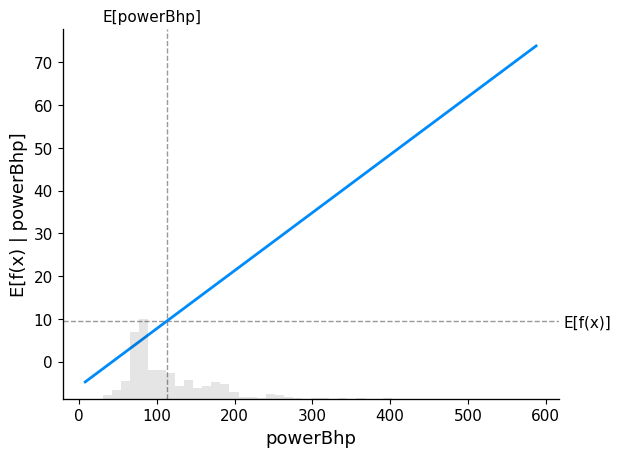

In [ ]:
#Partial dependency plot
shap.partial_dependence_plot("powerBhp",model.predict,X,ice=False,model_expected_value=True,feature_expected_value=True)

The linear blue line shows the positive correlation between the price and the powerBhp. The powerBhp is strong feature. The higher the powerBhp the highr the price of the car. Lets check binary dummy features if the car is registered in a Banglore location or in Kolkata location.

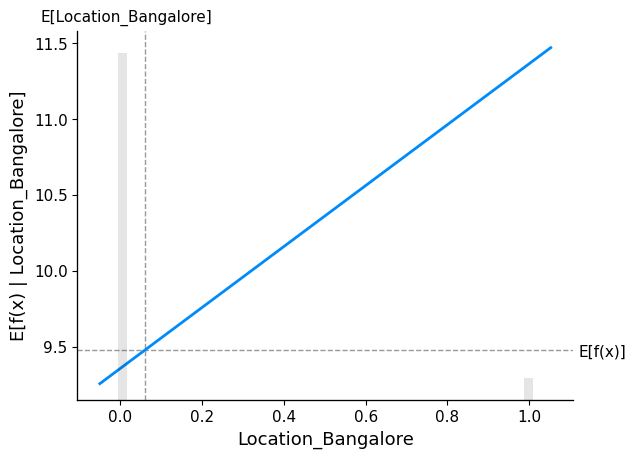

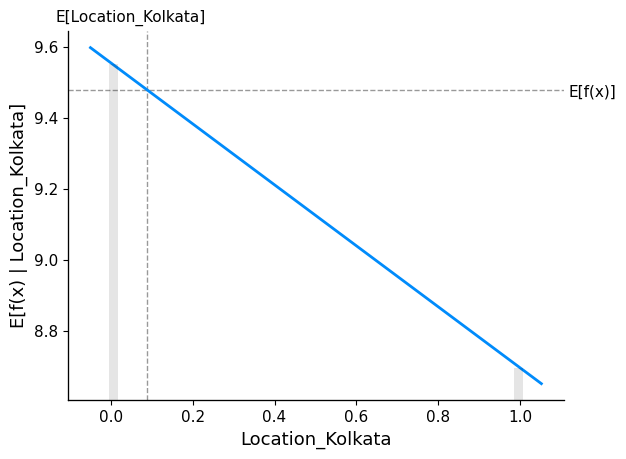

In [ ]:
shap.partial_dependence_plot(
    "Location_Bangalore",model.predict,X,ice=False,model_expected_value=True,feature_expected_value=True
)
shap.partial_dependence_plot(
    "Location_Kolkata",model.predict,X,ice=False,model_expected_value=True,feature_expected_value=True
)

If location is Kolkata then price is expected to be lower.

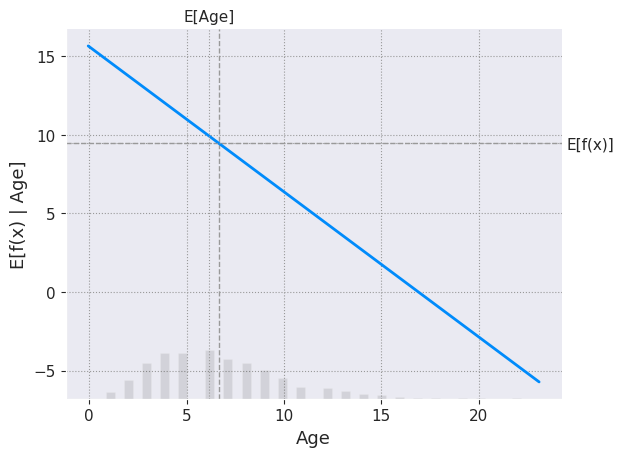

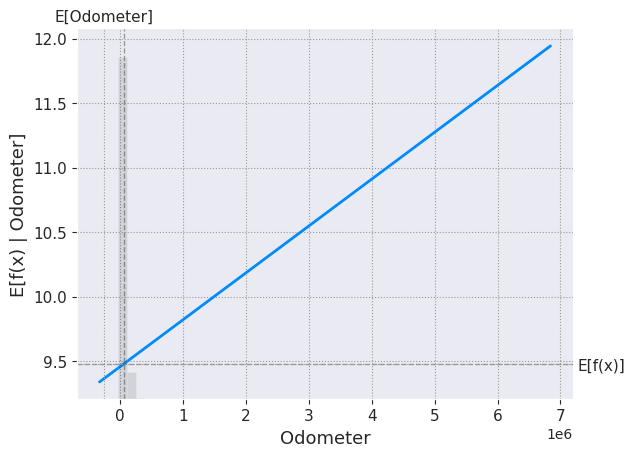

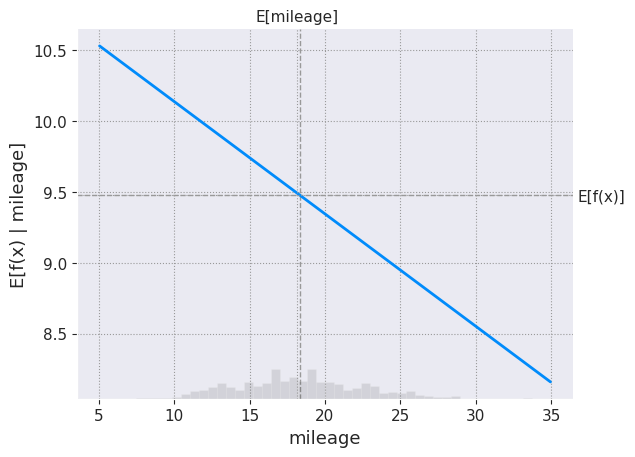

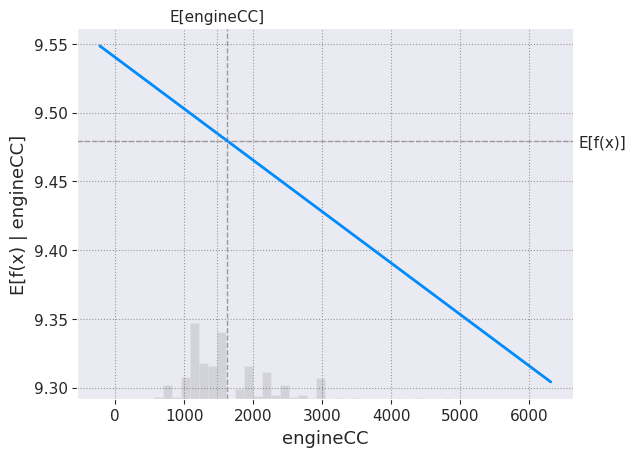

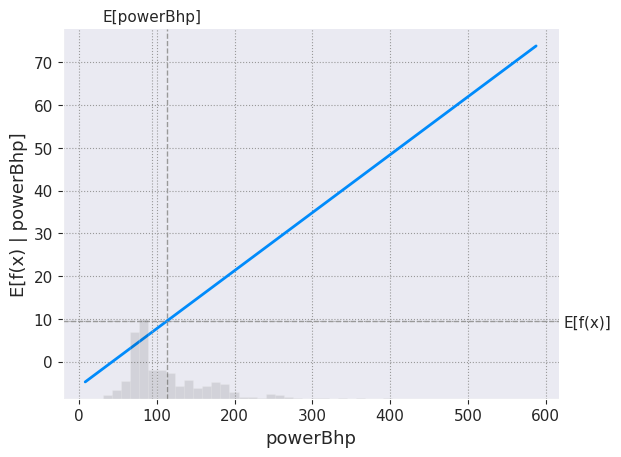

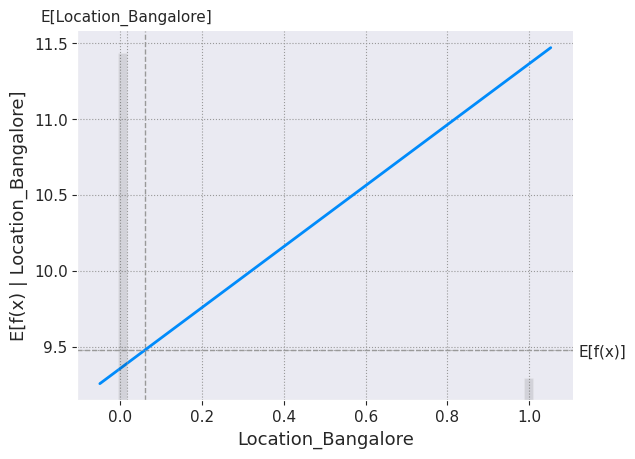

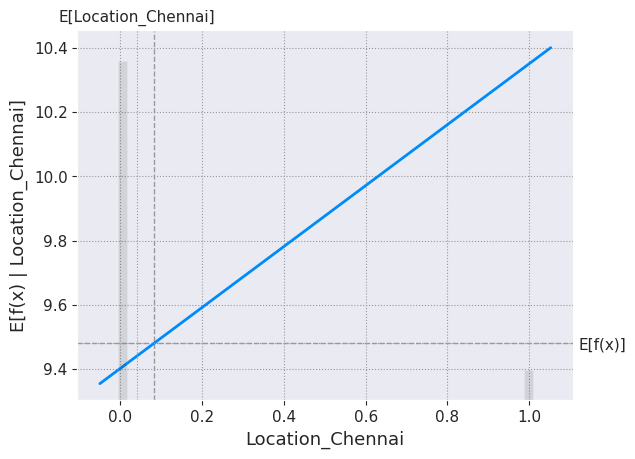

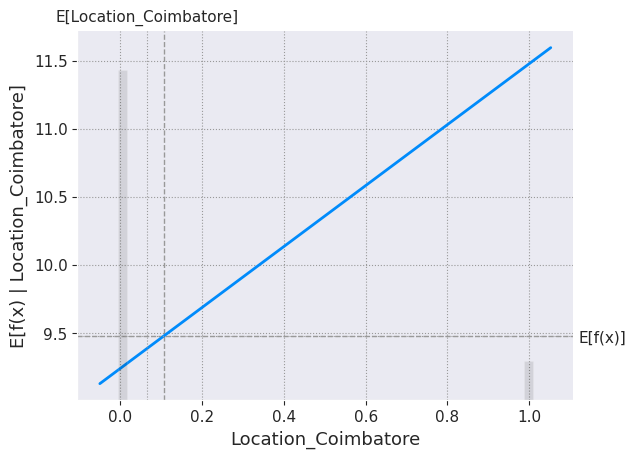

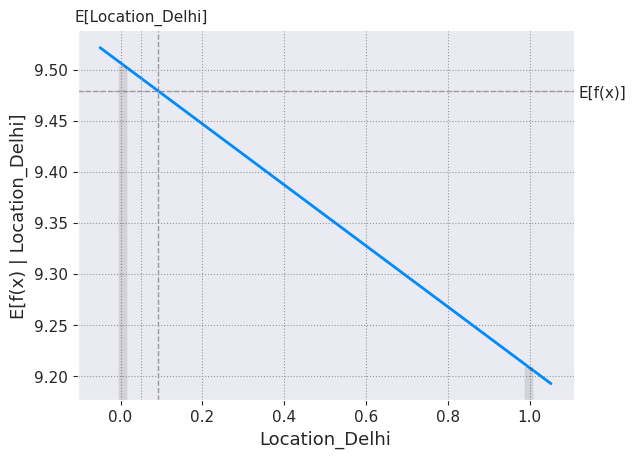

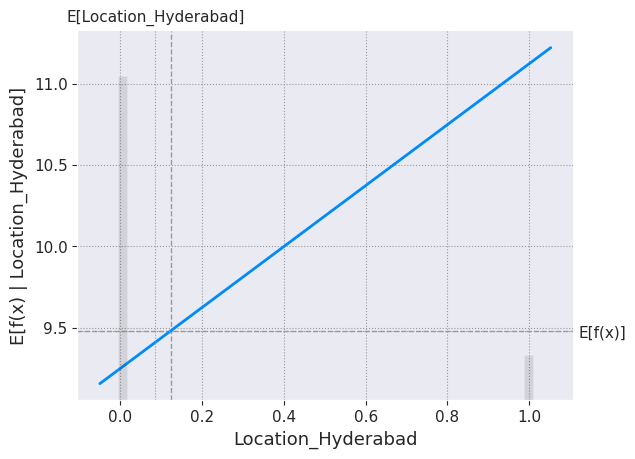

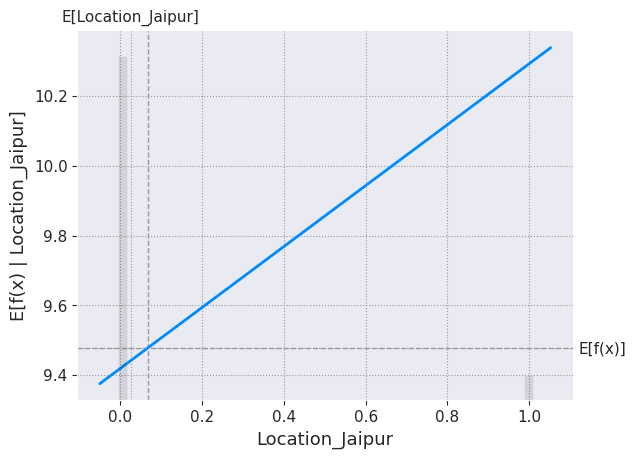

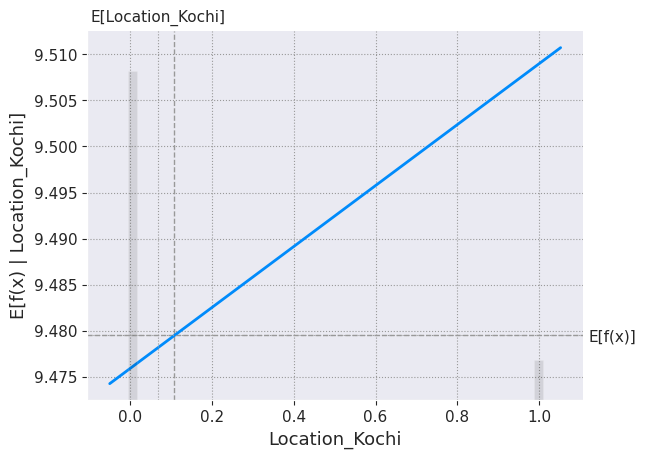

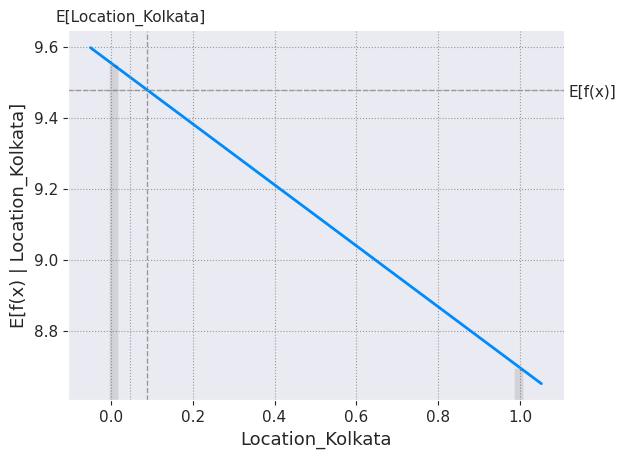

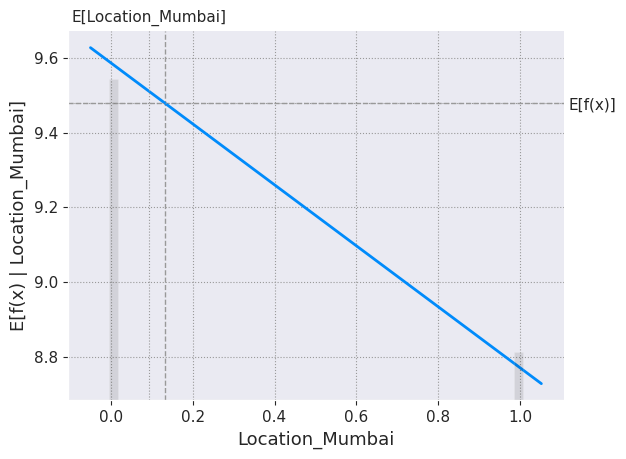

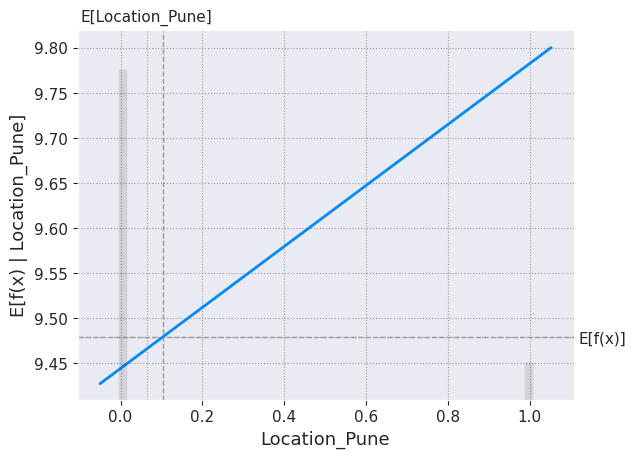

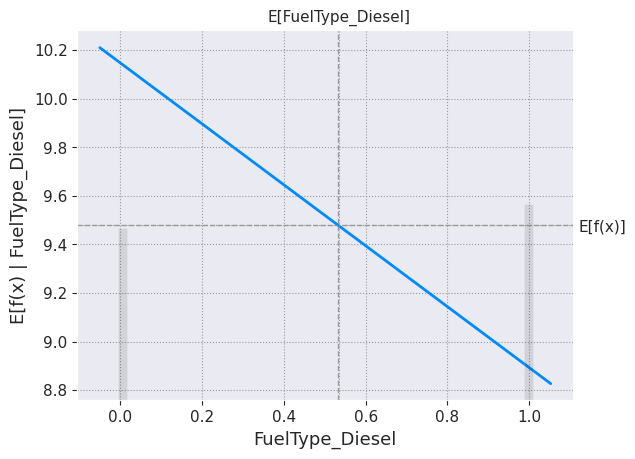

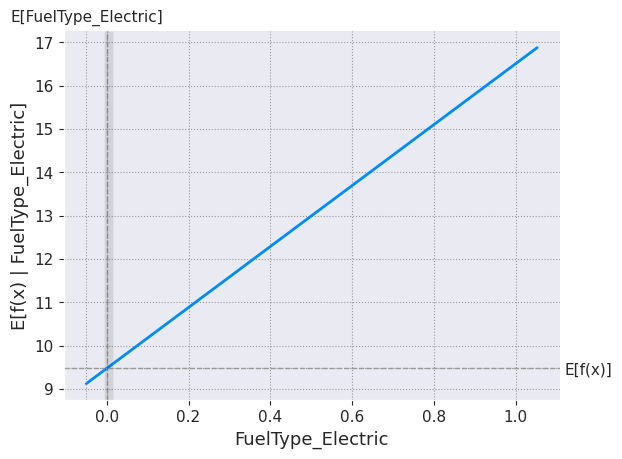

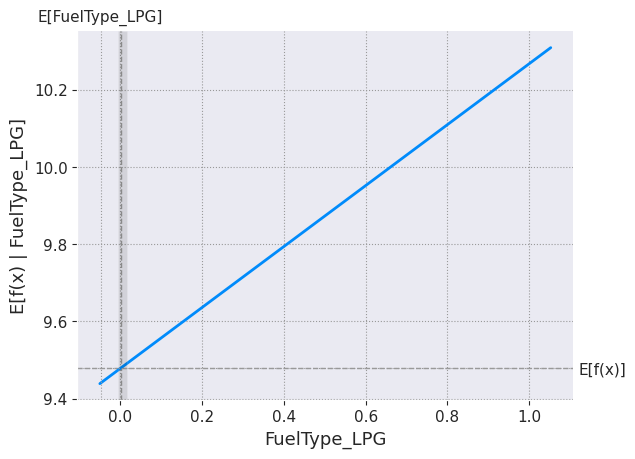

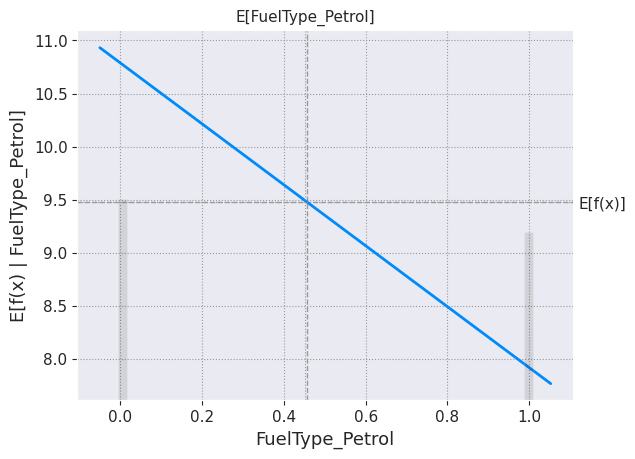

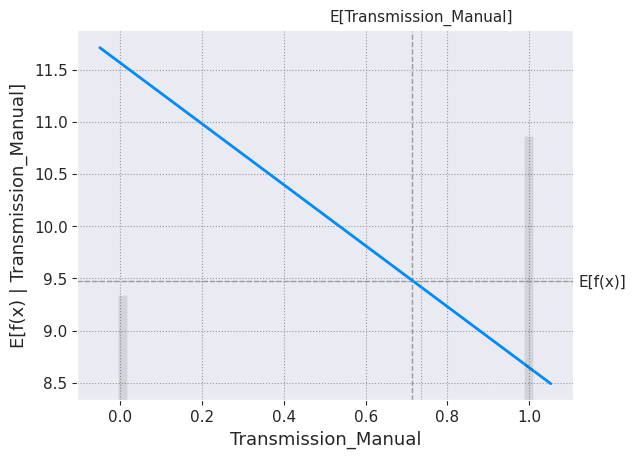

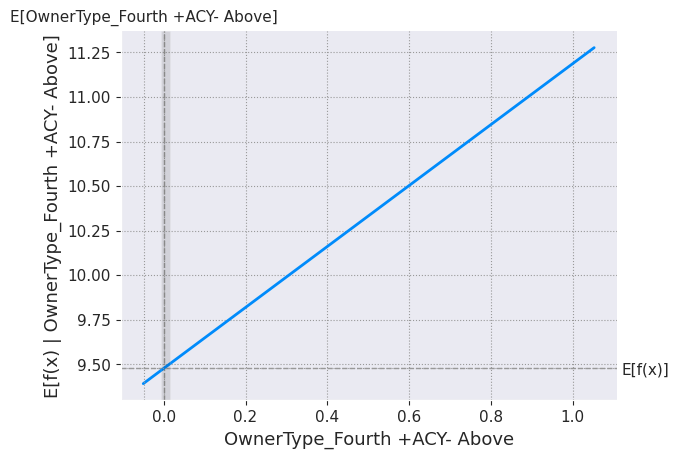

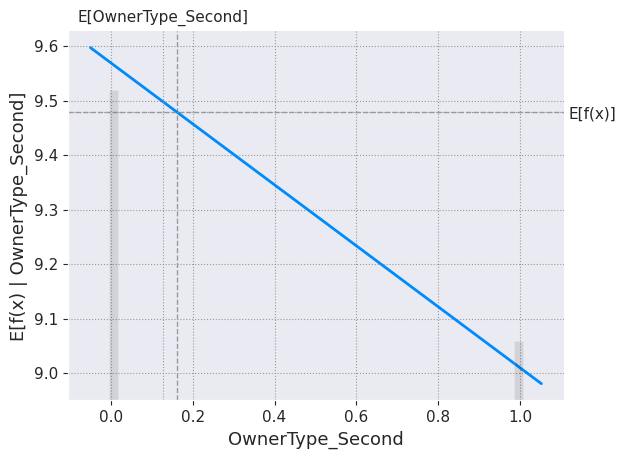

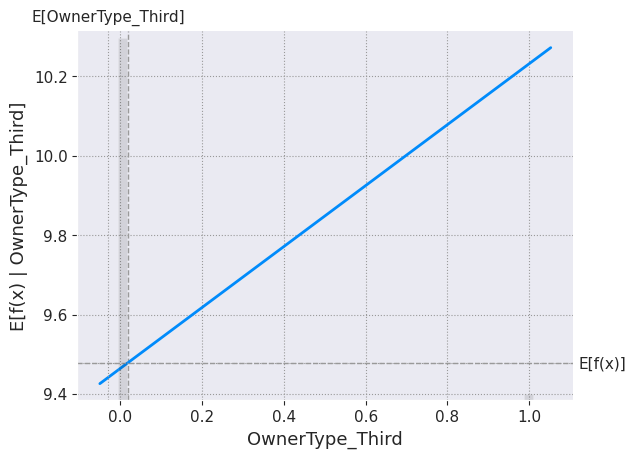

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#fig,axe=plt.subplots(nrows=12,ncols=2,figsize=(100,20))
#axe=axe.flatten()
#sns.set_style("darkgrid",{"grid.color":'.6',"grid.linestyle":':'})
axis_counter=0
for feature in df_autot.columns:
  #ax=axe[axis_counter]
  shap.partial_dependence_plot(
    feature,model.predict,X,ice=False,model_expected_value=True,feature_expected_value=True
  )
  #axis_counter+=1

